In [19]:
import numpy as np
def sphere_function(x):
    return np.sum(x**2)
dimension = 10
population_size = 50
max_iterations = 100
class RedDeerAlgorithm:
    def __init__(self, cost_function, dimension, LB, UB, population_size=30, max_iterations=100):
        self.cost_function = cost_function
        self.dimension = dimension
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.red_deer_percentage = 0.1  # نسبة ذكور الأيل الأحمر
        self.stag_percentage = 0.4      # نسبة الذكور المنافسة (Stags)
        self.LB = LB
        self.UB = UB
        # self.population = np.random.rand(population_size, dimension)  # تهيئة عشوائية للسكان
        self.population = np.random.uniform(LB, UB, (self.population_size, self.dimension))
        self.fitness = np.array([cost_function(deer) for deer in self.population])
        self.best_deer = self.population[np.argmin(self.fitness)]
        self.best_fitness = np.min(self.fitness)
        self.convergenceCurve = []

    def run(self):
        for iteration in range(self.max_iterations):
            self.red_deer_count = int(self.population_size * self.red_deer_percentage)
            self.stag_count = int(self.population_size * self.stag_percentage)

            # تحديد الأيل الأحمر (الأفضل) والذكور المنافسة
            self.red_deer_indices = np.argsort(self.fitness)[:self.red_deer_count]
            self.stags_indices = np.argsort(self.fitness)[self.red_deer_count:self.red_deer_count + self.stag_count]
            self.red_deer = self.population[self.red_deer_indices]
            self.stags = self.population[self.stags_indices]

            # التزاوج
            for i in range(self.red_deer_count):
                for j in range(self.population_size):
                    if np.random.rand() < 0.1:  # احتمالية التزاوج
                        alpha = np.random.rand()
                        new_deer = alpha * self.red_deer[i] + (1 - alpha) * self.population[j]
                        new_deer = np.clip(new_deer, self.LB, self.UB)  # الحفاظ على الحدود
                        new_fitness = self.cost_function(new_deer)

                        if new_fitness < self.fitness[j]:
                            self.population[j] = new_deer
                            self.fitness[j] = new_fitness

            # المنافسة
            for i in range(self.stag_count):
                for j in range(self.red_deer_count):
                    if np.random.rand() < 0.5:  # احتمالية المنافسة
                        if self.fitness[self.stags_indices[i]] < self.fitness[self.red_deer_indices[j]]:
                            # تبديل المواقع إذا كان الذكر المنافس أفضل
                            temp = self.population[self.red_deer_indices[j]].copy()
                            self.population[self.red_deer_indices[j]] = self.population[self.stags_indices[i]]
                            self.population[self.stags_indices[i]] = temp

                            # تحديث اللياقة
                            self.fitness[self.red_deer_indices[j]] = self.cost_function(self.population[self.red_deer_indices[j]])
                            self.fitness[self.stags_indices[i]] = self.cost_function(self.population[self.stags_indices[i]])

            # تحديث أفضل حل
            current_best_index = np.argmin(self.fitness)
            if self.fitness[current_best_index] < self.best_fitness:
                self.best_deer = self.population[current_best_index]
                self.best_fitness = self.fitness[current_best_index]
            self.convergenceCurve.append(self.best_fitness)
           # print(f"Iteration {iteration + 1}: Best Fitness = {self.best_fitness}")
        self.convergenceCurve = np.array(self.convergenceCurve)
        return self.best_deer, self.best_fitness
LB, UB = -100, 100
rda = RedDeerAlgorithm(sphere_function, dimension, LB, UB, population_size, max_iterations)
best_solution, best_fitness = rda.run()
print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)


Best Solution: [ 6.69577691 -1.12255718 -2.8012344   3.81964442 -4.20221029  4.01170566
 -0.3013178   3.91918542 -3.84273802 -4.91622254]
Best Fitness: 156.66920079371542


Text(0, 0.5, 'F(x)')

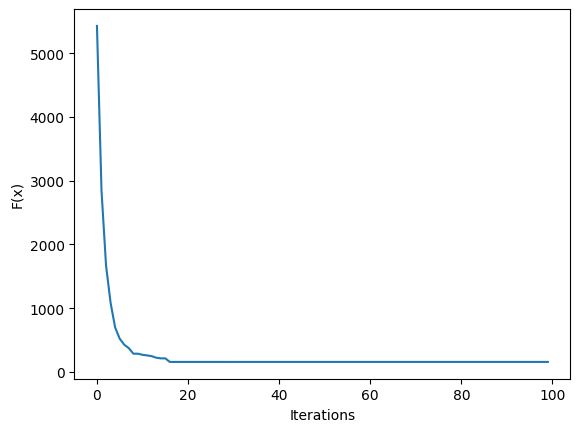

In [20]:
import matplotlib.pyplot as plt
plt.plot(rda.convergenceCurve)
plt.xlabel('Iterations')
plt.ylabel('F(x)')